In [ ]:
import os
import time
import copy
from collections import defaultdict
import torch
import shutil
import pandas as pd
from skimage import io, transform
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, utils
from torch import nn
import albumentations as A
from albumentations import (HorizontalFlip, ShiftScaleRotate, Normalize, Resize, Compose, GaussNoise)
import cv2
import albumentations as A
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
import torch.nn.functional as F
from PIL import Image
from torch import nn
import zipfile
import tqdm
import random
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
def reset_seed():
  torch.manual_seed(42)
  random.seed(42)
  torch.cuda.manual_seed(42)
reset_seed()

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [ ]:
data_fpath = "/content/drive/MyDrive/TRAINING SET/50_ NEGATIVE/IMAGE/"
all_ids = os.listdir(data_fpath)
print(all_ids)

['MSC453.bmp', 'MSC681.bmp', 'MSC2762.bmp', 'MSC1639.bmp', 'MSC220.bmp', 'MSC217.bmp', 'MSC2781.bmp', 'MSC110.bmp', 'MSC1200.bmp', 'MSC2209.bmp', 'MSC609.bmp', 'MSC2157.bmp', 'MSC2444.bmp', 'MSC1724.bmp', 'MSC2503.bmp', 'MSC1100.bmp', 'MSC2819.bmp', 'MSC241.bmp', 'MSC1094.bmp', 'MSC2815.bmp', 'MSC1149.bmp', 'MSC293.bmp', 'MSC2864.bmp', 'MSC2145.bmp', 'MSC407.bmp', 'MSC2213.bmp', 'MSC1791.bmp', 'MSC123.bmp', 'MSC6.bmp', 'MSC843.bmp', 'MSC1342.bmp', 'MSC1134.bmp', 'MSC1778.bmp', 'MSC1123.bmp', 'MSC1269.bmp', 'MSC30.bmp', 'MSC2019.bmp', 'MSC2056.bmp', 'MSC2648.bmp', 'MSC832.bmp', 'MSC2810.bmp', 'MSC2933.bmp', 'MSC1669.bmp', 'MSC577.bmp', 'MSC2728.bmp', 'MSC779.bmp', 'MSC2049.bmp', 'MSC1379.bmp', 'MSC1884.bmp', 'MSC2668.bmp', 'MSC27.bmp', 'MSC1201.bmp', 'MSC2274.bmp', 'MSC786.bmp', 'MSC1495.bmp', 'MSC2767.bmp', 'MSC977.bmp', 'MSC2984.bmp', 'MSC1648.bmp', 'MSC1314.bmp', 'MSC2418.bmp', 'MSC2045.bmp', 'MSC646.bmp', 'MSC2599.bmp', 'MSC322.bmp', 'MSC746.bmp', 'MSC353.bmp', 'MSC1979.bmp', 'MSC19

In [ ]:
seed = 42
np.random.seed = seed
img_size = 400
IMG_WIDTH = img_size
IMG_HEIGHT = img_size
IMG_CHANNELS = 3

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting into train and test sets
train_ids, test_ids = train_test_split(all_ids, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.uint8)
print(X_train.shape)
print(Y_train.shape)

(2400, 400, 400, 3)
(2400, 400, 400, 1)


In [ ]:
for n,file_name in tqdm.tqdm(enumerate(train_ids), total = len(train_ids)):
     path = data_fpath + file_name
     img = io.imread(path)[:,:,:IMG_CHANNELS]  #Read image in RGB format
     X_train[n] = img  #Fill empty X_train with values from img

100%|██████████| 2400/2400 [05:31<00:00,  7.23it/s]


In [ ]:
data_fpath = "/content/drive/MyDrive/TRAINING SET/50_ NEGATIVE/MASK/"
all_ids = os.listdir(data_fpath)
for i,file_name in tqdm.tqdm(enumerate(train_ids), total = len(train_ids)):
    path = data_fpath + file_name
    mask = io.imread(path)[:,:,0]
    mask = np.expand_dims(mask, axis=-1)
    Y_train[i] = mask

100%|██████████| 2400/2400 [04:08<00:00,  9.67it/s]


In [ ]:
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.uint8)
print(X_test.shape)
print(Y_test.shape)

(600, 400, 400, 3)
(600, 400, 400, 1)


In [ ]:
data_fpath = "/content/drive/MyDrive/TRAINING SET/50_ NEGATIVE/IMAGE/"
all_ids = os.listdir(data_fpath)
for j,file_name in tqdm.tqdm(enumerate(test_ids), total = len(test_ids)):
     path = data_fpath + file_name
     img = io.imread(path)[:,:,:IMG_CHANNELS]  #Read image in RGB format
     X_test[j] = img  #Fill empty X_test with values from img

100%|██████████| 600/600 [01:19<00:00,  7.51it/s]


In [ ]:
data_fpath='/content/drive/MyDrive/TRAINING SET/50_ NEGATIVE/MASK/'
all_ids = os.listdir(data_fpath)
for i,file_name in tqdm.tqdm(enumerate(test_ids), total = len(test_ids)):
    path = data_fpath + file_name
    mask = io.imread(path)[:,:,0]
    mask = np.expand_dims(mask, axis=-1)
    Y_test[i] = mask

100%|██████████| 600/600 [01:02<00:00,  9.56it/s]


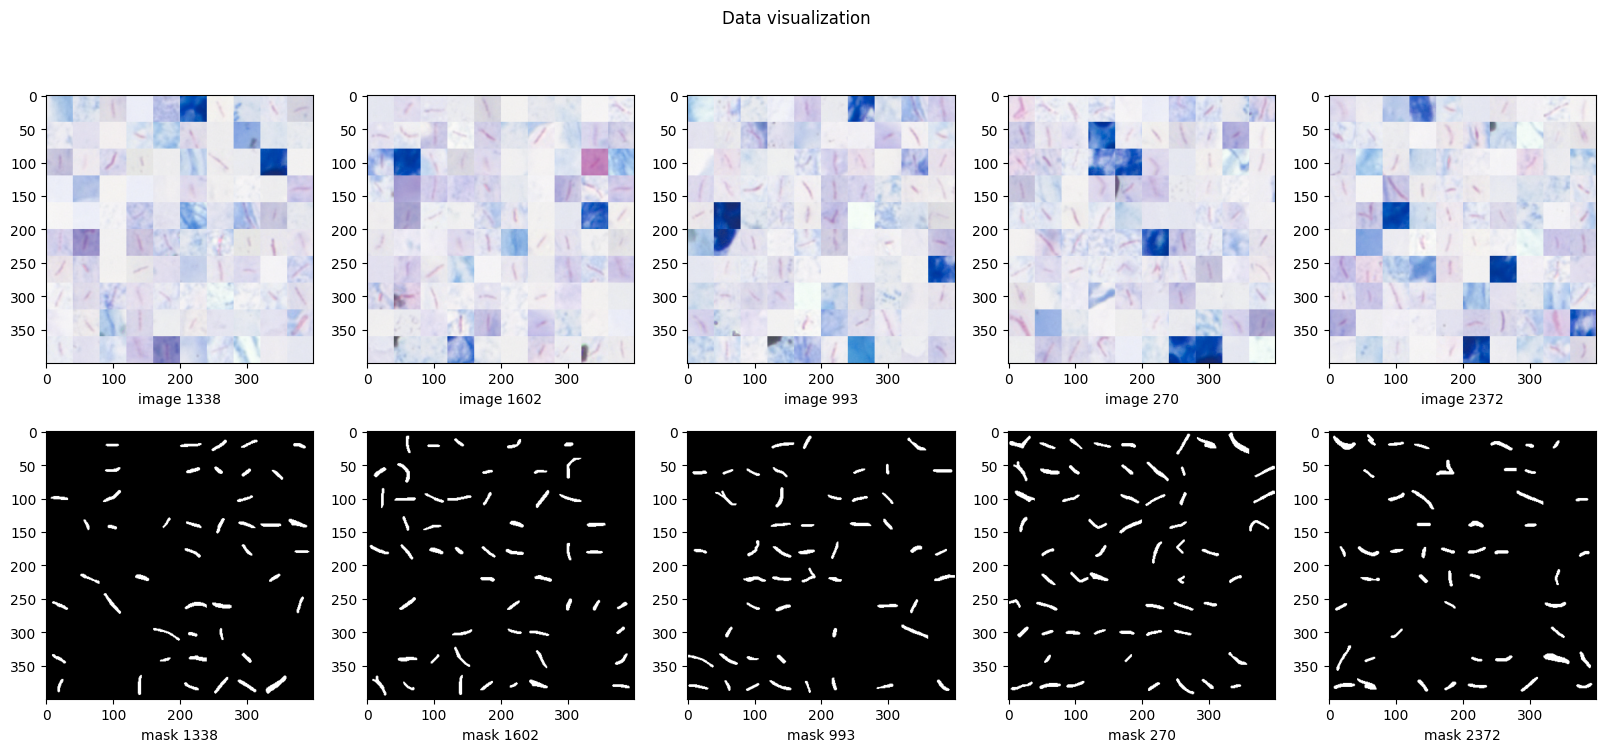

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

NumSamples = 5

# Generate random indices to select 5 samples
indices = np.random.randint(len(X_train), size=NumSamples)

# Create subplots for visualization
fig, ax = plt.subplots(2, NumSamples, figsize=(20, 8))
fig.suptitle("Data visualization")

# Visualize each sample
for i, idx in enumerate(indices):
    X, y = X_train[idx], Y_train[idx]
    ax[0, i].imshow(X.transpose(1,0,2), cmap='gray')  # Transpose to have channels in the last dimension
    ax[0, i].set_xlabel('image {}'.format(idx))
    ax[1, i].imshow(y.squeeze(), cmap='gray')
    ax[1, i].set_xlabel('mask {}'.format(idx))

plt.show()


In [ ]:
import numpy as np
np.save('X_train.npy', X_train)
np.save('Y_train.npy', Y_train)
np.save('X_test.npy', X_test)
np.save('Y_test.npy', Y_test)


In [ ]:
class Nuclie_data(Dataset):
        def __init__(self,image, mask, transform):
            self.image = image
            self.mask = mask
            self.transforms = transform

        def __len__(self):
            return len(self.image)


        def __getitem__(self,idx):
            img = self.image[idx].astype('float32')

            mask = self.mask[idx].astype('float32')

            augmented = self.transforms(image=img, mask=mask)
            img = augmented['image']
            mask = augmented['mask']
            mask = mask.permute(2, 0, 1)
            mask = torch.from_numpy(np.where(mask > 0.5, 1, 0))
            return (img,mask)

In [ ]:
def mask_convert(mask):
    mask = mask.clone().cpu().detach().numpy()
    mask = mask.transpose((1,2,0))
    std = np.array((0.5))
    mean = np.array((0.5))
    mask  = std * mask + mean
    mask = mask.clip(0,1)
    mask = np.squeeze(mask)
    return mask

# converting tensor to image
def image_convert(image):
    image = image.clone().cpu().numpy()
    image = image.transpose((1,2,0))
    std = np.array((0.5,0.5,0.5))
    mean = np.array((0.5,0.5,0.5))
    image  = std * image + mean
    image = image.clip(0,1)
    image = (image * 255).astype(np.uint8)
    return image

In [ ]:
def plot_img(no_):
    iter_ = iter(test_loader)
    images,masks = next(iter_)
    images = images.to(device)
    masks = masks.to(device)
    plt.figure(figsize=(10,6))
    for idx in range(0,no_):
         image = image_convert(images[idx])
         plt.subplot(2,no_,idx+1)
         plt.title('image')
         plt.imshow(image)
    for idx in range(0,no_):
         mask = mask_convert(masks[idx])
         plt.subplot(2,no_,idx+no_+1)
         plt.title('mask')
         plt.imshow(mask,cmap='gray')
    plt.show()

In [ ]:
import albumentations as A
!pip install pytorch-lightning
from albumentations.pytorch import ToTensorV2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 53.5 MB/s eta 0:00:00


In [ ]:
train_transform = A.Compose(
    [
        #A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
        A.Rotate(limit=20, p=1.0),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.1),
        A.Normalize(
            #mean = (0.485, 0.456, 0.406),
            #std = (0.229, 0.224, 0.225),
            mean = (0., 0., 0.),
            std = (1., 1., 1.),
            max_pixel_value = 255.0
        ),
        ToTensorV2(),
    ])
val_transform = A.Compose(
    [
        #A.RandomCrop(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
        #A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
        A.Normalize(
            mean = (0., 0., 0.),
            std = (1., 1., 1.),
            max_pixel_value = 255.0
        ),
        ToTensorV2(),
    ])

In [ ]:
X_train_1 = np.load("/content/X_train.npy")
Y_train_1 = np.load("/content/Y_train.npy")
X_test_1 = np.load("/content/X_test.npy")
Y_test_1 = np.load("/content/Y_test.npy")
print(X_train_1.shape)
print(Y_train_1.shape)
print(X_test_1.shape)
print(Y_test_1.shape)

(2400, 400, 400, 3)
(2400, 400, 400, 1)
(600, 400, 400, 3)
(600, 400, 400, 1)


In [ ]:
train_ds = Nuclie_data(X_train_1, Y_train_1, transform=train_transform)
num_train = int(len(train_ds)*0.9)
train_ds, val_ds = torch.utils.data.random_split(train_ds,[num_train, len(train_ds)-num_train])
test_ds = Nuclie_data(X_test_1, Y_test_1, transform=val_transform)

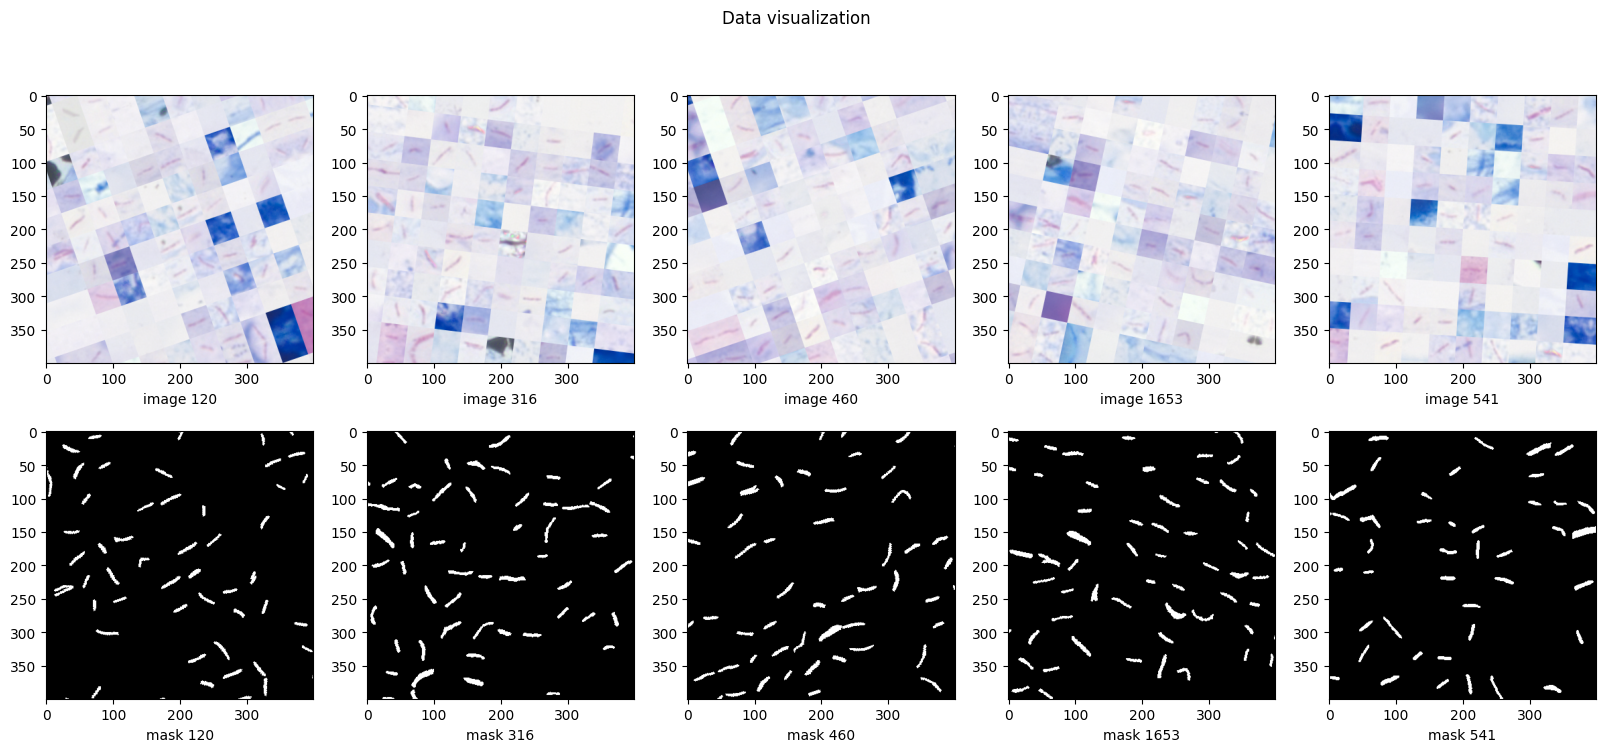

In [ ]:
# Visualize input data
import numpy as np
NumSamples = 5

k = np.random.randint(len(train_ds)*0.8,size = NumSamples)
fg , ax = plt.subplots(2,NumSamples,figsize = (20,8))
fg.suptitle("Data visualization")

for i,j in enumerate(k):

    X, y = train_ds[j]
    ax[0,i].imshow(X.transpose(0,2).transpose(0,1), cmap='gray')
    ax[0,i].set_xlabel('image {}'.format(j))
    ax[1,i].imshow(y[0], cmap='gray')
    ax[1,i].set_xlabel('mask {}'.format(j))

In [ ]:
batch_size=8
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=10)

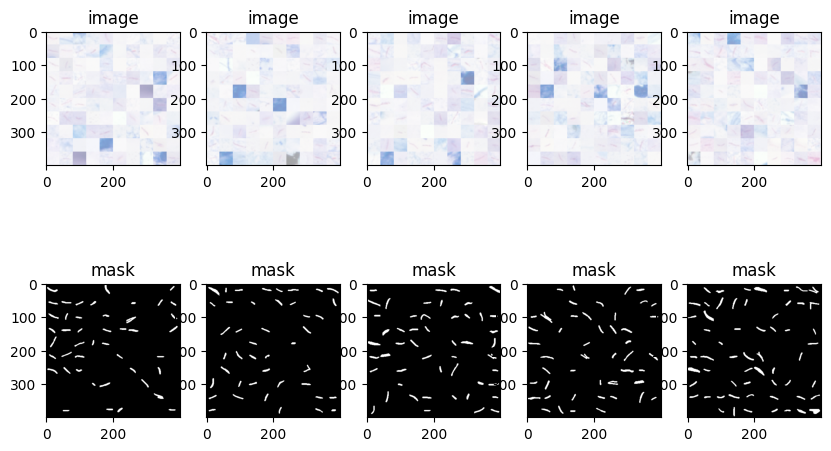

In [ ]:
plot_img(5)

In [ ]:
!git clone https://github.com/Beckschen/TransUNet.git

Cloning into 'TransUNet'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 119 (delta 65), reused 52 (delta 48), pack-reused 36 (from 1)
Receiving objects: 100% (119/119), 44.25 KiB | 730.00 KiB/s, done.
Resolving deltas: 100% (65/65), done.


In [ ]:
%cd TransUNet

/content/TransUNet


In [ ]:
!pip -qqq install ml_collections torch-summary

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
!wget https://storage.googleapis.com/vit_models/imagenet21k/R50+ViT-B_16.npz

--2024-10-29 04:15:39--  https://storage.googleapis.com/vit_models/imagenet21k/R50+ViT-B_16.npz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 461217452 (440M) [application/octet-stream]
Saving to: ‘R50+ViT-B_16.npz’

R50+ViT-B_16.npz    100%[===================>] 439.85M  25.1MB/s    in 18s     

2024-10-29 04:15:58 (24.7 MB/s) - ‘R50+ViT-B_16.npz’ saved [461217452/461217452]



In [ ]:
from networks.vit_seg_modeling import VisionTransformer as ViT_seg
from networks.vit_seg_modeling import CONFIGS as CONFIGS_ViT_seg

config_vit = CONFIGS_ViT_seg["R50-ViT-B_16"]
config_vit.n_classes = 1
config_vit.n_skip = 3
model = ViT_seg(config_vit, img_size=400, num_classes=config_vit.n_classes).to(device)
weight = np.load('R50+ViT-B_16.npz')
model.load_from(weights=weight)

load_pretrained: grid-size from 14 to 25


In [ ]:
class DiceBCELoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(DiceBCELoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):

        #comment out if your model contains a sigmoid or equivalent activation layer
        inputs = F.sigmoid(inputs)
        bce_weight = 0.5
        #flatten label and prediction tensors
        inputs = inputs.view(-1)
        targets = targets.view(-1)

        intersection = (inputs * targets).sum()
        dice_loss = 1 - (2.*intersection + smooth)/(inputs.sum() + targets.sum() + smooth)
        BCE = F.binary_cross_entropy(inputs, targets, reduction='mean')
        loss_final = BCE * bce_weight + dice_loss * (1 - bce_weight)
        return loss_final

## IOU computation
def iou_(y_pred,y):
    inputs = y_pred.reshape(-1)
    targets = y.reshape(-1)
    intersection = (inputs * targets).sum()
    total = (inputs + targets).sum()
    union = total - intersection
    smooth = 1
    iou = (intersection + smooth)/(union + smooth)
    return iou



def iou_batch(y_pred,y):
    '''computes mean iou for a batch of ground truth masks and predicted masks'''
    ious = []
    y_pred = F.sigmoid(y_pred)
    y_pred = y_pred.clone().cpu().detach().numpy()
    y = y.clone().cpu().detach().numpy()

    for pred, label in zip(y_pred, y):
        ious.append(iou_(pred, label))
    iou = np.nanmean(ious)
    return iou


def dice_pytorch(predictions: torch.Tensor, labels: torch.Tensor, e: float = 1e-7):
    """Calculates Dice coefficient for a tensor of predictions"""
#     predictions = sigmoid(predictions)
    predictions = torch.sigmoid(predictions)
    predictions = torch.from_numpy(np.where(predictions.cpu() > 0.5, 1, 0))
    labels = labels.long().cpu()
    intersection = (predictions & labels).float().sum((1, 2))
    return ((2 * intersection) + e) / (predictions.float().sum((1, 2)) + labels.float().sum((1, 2)) + e)

In [ ]:
def save_ckp(state, is_best, checkpoint_path, best_model_path):
    """
    state: checkpoint we want to save
    is_best: is this the best checkpoint; min validation loss
    checkpoint_path: path to save checkpoint
    best_model_path: path to save best model
    """
    # save checkpoint data to the path given, checkpoint_path
    torch.save(state, checkpoint_path)
    # if it is a best model, min validation loss
    if is_best:
        # copy that checkpoint file to best path given, best_model_path
        shutil.copyfile(checkpoint_path, best_model_path)

def load_ckp( model, optimizer):
    """
    checkpoint_path: path to save checkpoint
    model: model that we want to load checkpoint parameters into
    optimizer: optimizer we defined in previous training
    """
    # load check point
    #torch.save(model, 'model.h5')
    # initialize state_dict from checkpoint to model
    model.load_state_dict(checkpoint['state_dict'])
    # initialize optimizer from checkpoint to optimizer
    optimizer.load_state_dict(checkpoint['optimizer'])
    # initialize valid_loss_min from checkpoint to valid_loss_min
    valid_mean_iou = checkpoint['mean_iou']
    # return model, optimizer, epoch value, min validation loss
    return model, optimizer, checkpoint['epoch'], valid_mean_iou.item()

In [ ]:
def pixel_accuracy(pred_mask, true_mask):
    """
    Compute pixel-wise accuracy between predicted mask and true mask.

    Parameters:
        pred_mask (torch.Tensor): Predicted mask tensor.
        true_mask (torch.Tensor): True mask tensor.

    Returns:
        accuracy (float): Pixel-wise accuracy.
    """
    pred_mask = (pred_mask > 0.5).float()  # Convert to binary mask
    correct_pixels = torch.sum((pred_mask == true_mask).float())
    total_pixels = true_mask.numel()
    accuracy = correct_pixels / total_pixels
    return accuracy.item()


In [ ]:
def pixel_wise_precision(pred_mask, true_mask):
    """
    Compute pixel-wise precision between predicted mask and true mask.

    Parameters:
        pred_mask (torch.Tensor): Predicted mask tensor.
        true_mask (torch.Tensor): True mask tensor.

    Returns:
        precision (float): Pixel-wise precision.
    """
    pred_mask = (pred_mask > 0.5).float()  # Convert to binary mask
    TP = torch.sum((pred_mask * true_mask).float())
    FP = torch.sum(pred_mask) - TP

    if TP + FP == 0:
        return 0  # Prevent division by zero
    else:
        precision = TP / (TP + FP)
        return precision.item()


def pixel_wise_recall(pred_mask, true_mask):
    """
    Compute pixel-wise recall between predicted mask and true mask.

    Parameters:
        pred_mask (torch.Tensor): Predicted mask tensor.
        true_mask (torch.Tensor): True mask tensor.

    Returns:
        recall (float): Pixel-wise recall.
    """
    pred_mask = (pred_mask > 0.5).float()  # Convert to binary mask
    TP = torch.sum((pred_mask * true_mask).float())
    FN = torch.sum(true_mask) - TP

    if TP + FN == 0:
        return 0  # Prevent division by zero
    else:
        recall = TP / (TP + FN)
        return recall.item()


def pixel_wise_f1_score(pred_mask, true_mask):
    """
    Compute pixel-wise F1 score between predicted mask and true mask.

    Parameters:
        pred_mask (torch.Tensor): Predicted mask tensor.
        true_mask (torch.Tensor): True mask tensor.

    Returns:
        f1_score (float): Pixel-wise F1 score.
    """
    precision = pixel_wise_precision(pred_mask, true_mask)
    recall = pixel_wise_recall(pred_mask, true_mask)

    if precision + recall == 0:
        return 0  # Prevent division by zero
    else:
        f1_score = 2 * (precision * recall) / (precision + recall)
        return f1_score


In [ ]:
import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score
best_iou=0.0
def save_ckp(state, is_best, checkpoint_path, best_model_path):
    """
    state: checkpoint we want to save
    is_best: is this the best checkpoint; min validation loss
    checkpoint_path: path to save checkpoint
    best_model_path: path to save best model
    """
    # save checkpoint data to the path given, checkpoint_path
    torch.save(state, checkpoint_path)
    # if it is a best model, min validation loss
    if is_best:
        # copy that checkpoint file to best path given, best_model_path
        shutil.copyfile(checkpoint_path, best_model_path)
epochs = 10
criterion = DiceBCELoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
valid_loss_min = 3.95275

train_loss, val_loss = [], []
train_iou, val_iou = [], []
train_accuracy, val_accuracy = [], []
train_precision, val_precision = [], []
train_recall, val_recall = [], []
train_f1, val_f1 = [], []

for epoch in range(epochs):
    print('Epoch {}/{}'.format(epoch + 1, epochs))
    start_time = time.time()
    running_train_loss = []
    running_train_score = []
    running_train_accuracy = []
    running_train_precision = []
    running_train_recall = []
    running_train_f1 = []

    for image, mask in tqdm.tqdm(train_loader):
        image = image.to(device,dtype=torch.float)
        mask = mask.to(device,dtype=torch.float)

        pred_mask = model.forward(image)  # forward propagation
        loss = criterion(pred_mask, mask)
        score = iou_batch(pred_mask, mask)
        optimizer.zero_grad()  # setting gradient to zero
        loss.backward()
        optimizer.step()

        # Pixel-wise segmentation accuracy
        accuracy = pixel_accuracy(pred_mask, mask)

        # Inside the training loop:
        precision = pixel_wise_precision(pred_mask, mask)
        recall = pixel_wise_recall(pred_mask, mask)
        f1 = pixel_wise_f1_score(pred_mask, mask)

        running_train_loss.append(loss.item())
        running_train_score.append(score)
        running_train_accuracy.append(accuracy)
        running_train_precision.append(precision)
        running_train_recall.append(recall)
        running_train_f1.append(f1)

    else:
        running_test_loss = []
        running_test_score = []
        running_test_accuracy = []
        running_test_precision = []
        running_test_recall = []
        running_test_f1 = []

        with torch.no_grad():
            for image, mask in test_loader:
                image = image.to(device, dtype=torch.float)
                mask = mask.to(device, dtype=torch.float)
                pred_mask = model.forward(image)
                loss = criterion(pred_mask, mask)
                score = iou_batch(pred_mask, mask)

                # Pixel-wise segmentation accuracy
                accuracy = pixel_accuracy(pred_mask, mask)

                # Inside the validation loop:
                precision = pixel_wise_precision(pred_mask, mask)
                recall = pixel_wise_recall(pred_mask, mask)
                f1 = pixel_wise_f1_score(pred_mask, mask)

                running_test_loss.append(loss.item())
                running_test_score.append(score)
                running_test_accuracy.append(accuracy)
                running_test_precision.append(precision)
                running_test_recall.append(recall)
                running_test_f1.append(f1)

    # Calculate average metrics
    epoch_train_loss, epoch_train_score = np.mean(running_train_loss), np.mean(running_train_score)
    epoch_train_accuracy = np.mean(running_train_accuracy)
    epoch_train_precision = np.mean(running_train_precision)
    epoch_train_recall = np.mean(running_train_recall)
    epoch_train_f1 = np.mean(running_train_f1)

    print('Train loss: {:.4f}, IOU: {:.4f}, Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1: {:.4f}'.format(
        epoch_train_loss, epoch_train_score, epoch_train_accuracy, epoch_train_precision, epoch_train_recall,
        epoch_train_f1))

    train_loss.append(epoch_train_loss)
    train_iou.append(epoch_train_score)
    train_accuracy.append(epoch_train_accuracy)
    train_precision.append(epoch_train_precision)
    train_recall.append(epoch_train_recall)
    train_f1.append(epoch_train_f1)

    epoch_test_loss, epoch_test_score = np.mean(running_test_loss), np.mean(running_test_score)
    epoch_test_accuracy = np.mean(running_test_accuracy)
    epoch_test_precision = np.mean(running_test_precision)
    epoch_test_recall = np.mean(running_test_recall)
    epoch_test_f1 = np.mean(running_test_f1)

    print('Testing loss: {:.4f}, IOU: {:.4f}, Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1: {:.4f}'.format(
        epoch_test_loss, epoch_test_score, epoch_test_accuracy, epoch_test_precision, epoch_test_recall, epoch_test_f1))

    val_loss.append(epoch_test_loss)
    val_iou.append(epoch_test_score)
    val_accuracy.append(epoch_test_accuracy)
    val_precision.append(epoch_test_precision)
    val_recall.append(epoch_test_recall)
    val_f1.append(epoch_test_f1)
    epoch_test_score = np.mean(running_test_score)

    # Check if IOU improved
    if epoch_test_score > best_iou:
        print('Mean IOU improved ({:.4f} --> {:.4f}).  Saving model ...'.format(best_iou, epoch_test_score))
        best_iou = epoch_test_score

        # Save the model checkpoint
        checkpoint = {
            'epoch': epoch + 1,
            'mean_iou': epoch_test_score,
            'state_dict': model.state_dict(),
            'optimizer': optimizer.state_dict(),
        }
        save_ckp(checkpoint, True, 'checkpoint.pt', 'best_model.pt')
    else:
        print('Mean IOU did not improve ({:.4f} <= {:.4f}).'.format(epoch_test_score, best_iou))

    time_elapsed = time.time() - start_time
    print('{:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))


Epoch 1/10


100%|██████████| 270/270 [03:53<00:00,  1.16it/s]


Train loss: 0.1772, IOU: 0.5970, Accuracy: 0.9867, Precision: 0.8174, Recall: 0.8166, F1: 0.8143
Testing loss: 0.0636, IOU: 0.8055, Accuracy: 0.9931, Precision: 0.9245, Recall: 0.8965, F1: 0.9102
Mean IOU improved (0.0000 --> 0.8055).  Saving model ...
4m 22s
Epoch 2/10


100%|██████████| 270/270 [03:53<00:00,  1.16it/s]


Train loss: 0.0723, IOU: 0.7871, Accuracy: 0.9917, Precision: 0.9010, Recall: 0.8855, F1: 0.8929
Testing loss: 0.0547, IOU: 0.8316, Accuracy: 0.9938, Precision: 0.9263, Recall: 0.9153, F1: 0.9207
Mean IOU improved (0.8055 --> 0.8316).  Saving model ...
4m 26s
Epoch 3/10


100%|██████████| 270/270 [03:53<00:00,  1.16it/s]


Train loss: 0.0658, IOU: 0.8054, Accuracy: 0.9923, Precision: 0.9084, Recall: 0.8947, F1: 0.9013
Testing loss: 0.0469, IOU: 0.8529, Accuracy: 0.9947, Precision: 0.9440, Recall: 0.9183, F1: 0.9309
Mean IOU improved (0.8316 --> 0.8529).  Saving model ...
4m 22s
Epoch 4/10


100%|██████████| 270/270 [03:52<00:00,  1.16it/s]


Train loss: 0.0617, IOU: 0.8168, Accuracy: 0.9928, Precision: 0.9137, Recall: 0.9008, F1: 0.9070
Testing loss: 0.0417, IOU: 0.8676, Accuracy: 0.9954, Precision: 0.9353, Recall: 0.9490, F1: 0.9420
Mean IOU improved (0.8529 --> 0.8676).  Saving model ...
4m 26s
Epoch 5/10


100%|██████████| 270/270 [03:52<00:00,  1.16it/s]


Train loss: 0.0585, IOU: 0.8257, Accuracy: 0.9931, Precision: 0.9181, Recall: 0.9058, F1: 0.9118
Testing loss: 0.0396, IOU: 0.8737, Accuracy: 0.9955, Precision: 0.9572, Recall: 0.9261, F1: 0.9414
Mean IOU improved (0.8676 --> 0.8737).  Saving model ...
4m 23s
Epoch 6/10


100%|██████████| 270/270 [03:52<00:00,  1.16it/s]


Train loss: 0.0555, IOU: 0.8337, Accuracy: 0.9935, Precision: 0.9223, Recall: 0.9102, F1: 0.9161
Testing loss: 0.0355, IOU: 0.8854, Accuracy: 0.9961, Precision: 0.9491, Recall: 0.9519, F1: 0.9505
Mean IOU improved (0.8737 --> 0.8854).  Saving model ...
4m 23s
Epoch 7/10


100%|██████████| 270/270 [03:52<00:00,  1.16it/s]


Train loss: 0.0537, IOU: 0.8389, Accuracy: 0.9937, Precision: 0.9249, Recall: 0.9131, F1: 0.9189
Testing loss: 0.0331, IOU: 0.8923, Accuracy: 0.9964, Precision: 0.9564, Recall: 0.9517, F1: 0.9540
Mean IOU improved (0.8854 --> 0.8923).  Saving model ...
4m 26s
Epoch 8/10


100%|██████████| 270/270 [03:52<00:00,  1.16it/s]


Train loss: 0.0512, IOU: 0.8457, Accuracy: 0.9940, Precision: 0.9284, Recall: 0.9170, F1: 0.9226
Testing loss: 0.0294, IOU: 0.9034, Accuracy: 0.9969, Precision: 0.9592, Recall: 0.9612, F1: 0.9602
Mean IOU improved (0.8923 --> 0.9034).  Saving model ...
4m 22s
Epoch 9/10


100%|██████████| 270/270 [03:52<00:00,  1.16it/s]


Train loss: 0.0494, IOU: 0.8506, Accuracy: 0.9942, Precision: 0.9307, Recall: 0.9200, F1: 0.9252
Testing loss: 0.0280, IOU: 0.9077, Accuracy: 0.9970, Precision: 0.9674, Recall: 0.9545, F1: 0.9609
Mean IOU improved (0.9034 --> 0.9077).  Saving model ...
4m 21s
Epoch 10/10


100%|██████████| 270/270 [03:52<00:00,  1.16it/s]


Train loss: 0.0485, IOU: 0.8532, Accuracy: 0.9943, Precision: 0.9322, Recall: 0.9213, F1: 0.9266
Testing loss: 0.0248, IOU: 0.9172, Accuracy: 0.9974, Precision: 0.9743, Recall: 0.9577, F1: 0.9659
Mean IOU improved (0.9077 --> 0.9172).  Saving model ...
4m 22s


In [ ]:
!pip install h5py

In [ ]:
model, optimizer, start_epoch,valid_mean_iou = load_ckp(model, optimizer)

In [ ]:
def val_run(model, test_loader):
    model.eval()
    running_val_loss = []
    running_val_iou_score = []
    running_val_dice_score = []
    with torch.no_grad():
        for image,mask in tqdm.tqdm(val_loader):
                image = image.to(device,dtype=torch.float)
                mask = mask.to(device,dtype=torch.float)
                pred_mask = model.forward(image)
                loss = criterion(pred_mask,mask)
                iou_score = iou_batch(pred_mask,mask)
                dice_score = dice_pytorch(pred_mask.float(), mask).mean().item()
                running_val_loss.append(loss.item())
                running_val_iou_score.append(iou_score)
                running_val_dice_score.append(dice_score)

    print(f'| Validation Loss: {np.mean(np.array(running_val_loss))} | Validation Mean IoU: {np.mean(np.array(running_val_iou_score))} | Validation Mean Dice: {np.mean(np.array(running_val_dice_score))}')
val_run(model,val_loader)

100%|██████████| 30/30 [00:09<00:00,  3.03it/s]

| Validation Loss: 0.047346029058098794 | Validation Mean IoU: 0.856134015816839 | Validation Mean Dice: 0.9215730607509613


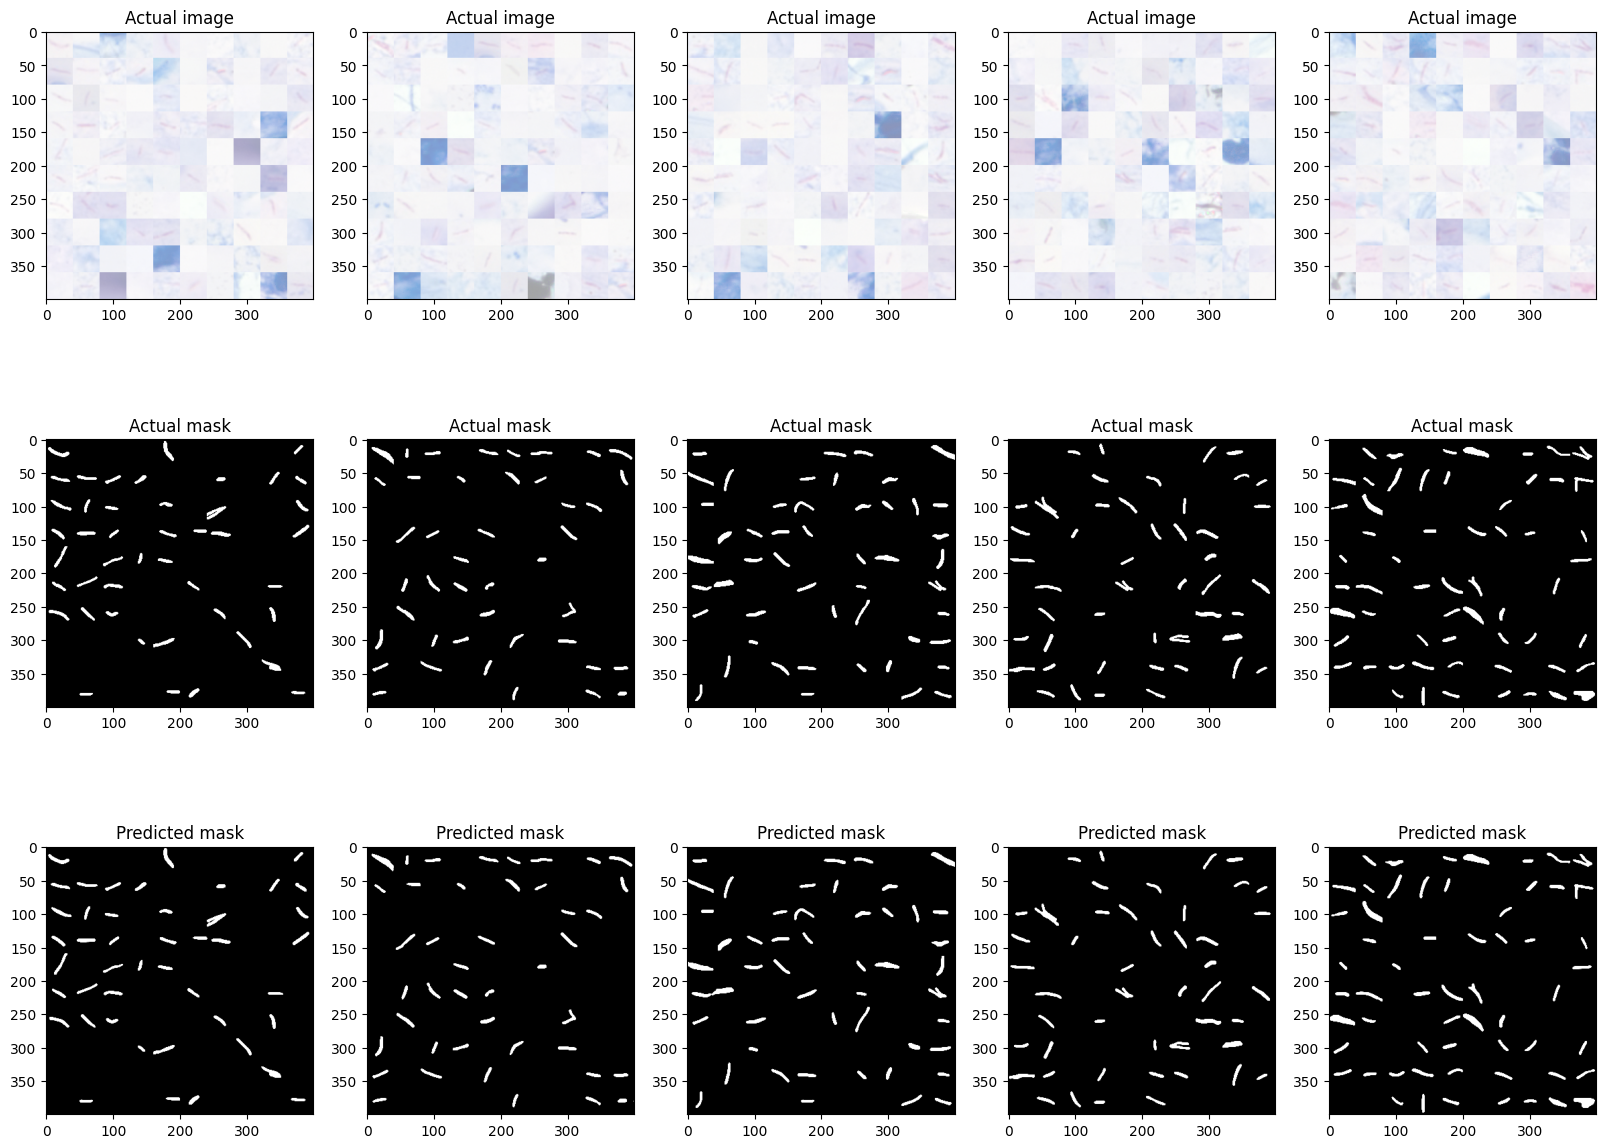

In [ ]:
iter_ = iter(test_loader)
image,mask = next(iter_)
image = image.to(device,dtype=torch.float)
mask = mask.to(device,dtype=torch.float)
y_pred = model.forward(image)


plt.figure(figsize=(20,15))
for i in range(0,5):
    plt.subplot(3,5,i+1)
    plt.title('Actual image')
    plt.imshow(image_convert(image[i]))
for i in range(0,5):
    plt.subplot(3,5,i+5+1)
    plt.title('Actual mask')
    plt.imshow(mask_convert(mask[i]),cmap='gray')
for i in range(0,5):
    plt.subplot(3,5,i+10+1)
    plt.title('Predicted mask')
    plt.imshow(mask_convert(y_pred[i]),cmap='gray')
plt.show()

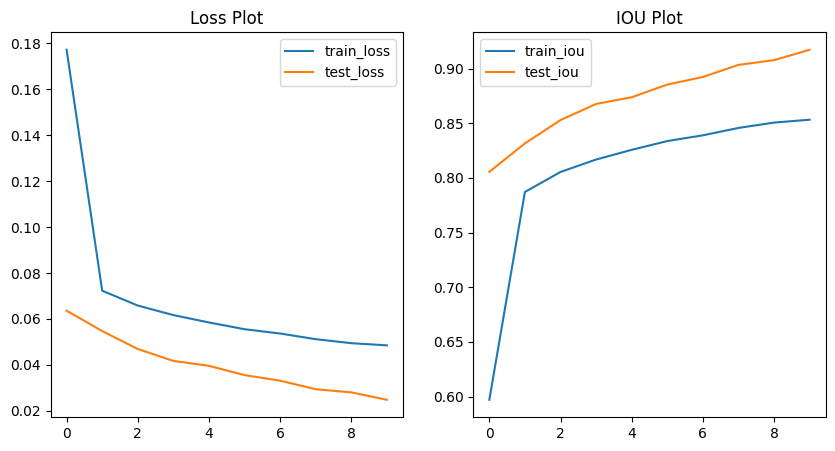

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(train_loss,label='train_loss')
plt.plot(val_loss,label='test_loss')
plt.legend()
plt.title('Loss Plot')
plt.subplot(1,2,2)
plt.plot(train_iou,label='train_iou')
plt.plot(val_iou,label='test_iou')
plt.legend()
plt.title('IOU Plot')
plt.show()

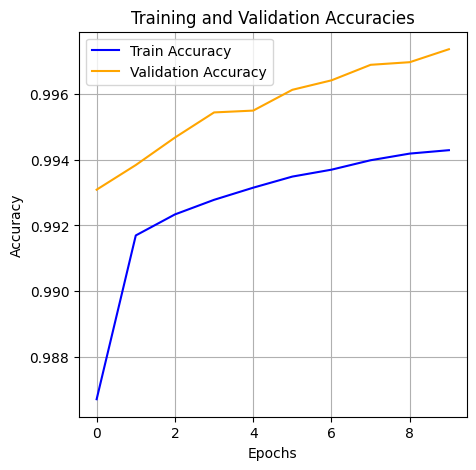

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracies
plt.figure(figsize=(5, 5))
plt.plot(train_accuracy, label='Train Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.grid(True)
plt.show()


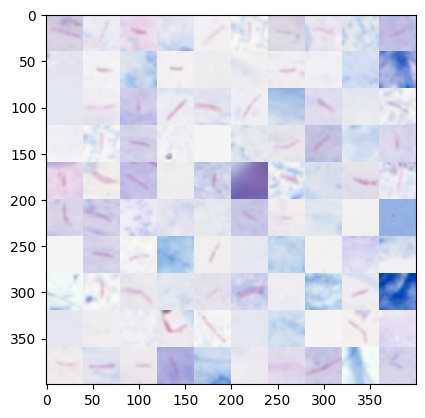

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the image
image_path = "/content/drive/MyDrive/VALIDATION SET/50_ NEGATIVE/IMAGE/MSC1.bmp"
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('on')  # Turn off axis
plt.show()


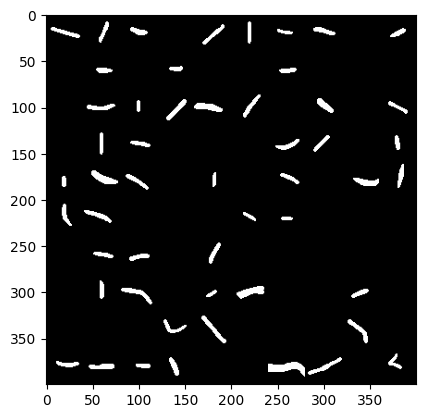

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the image
image_path = "/content/drive/MyDrive/VALIDATION SET/50_ NEGATIVE/MASK/MSC1.bmp"
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('on')  # Turn off axis
plt.show()


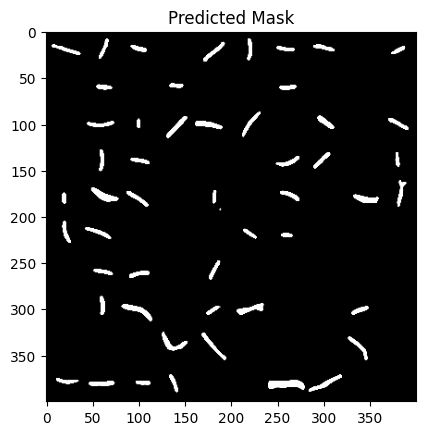

In [ ]:
import torch
from torchvision import transforms
from PIL import Image

# Load your image
image_path = "/content/drive/MyDrive/VALIDATION SET/50_ NEGATIVE/IMAGE/MSC1.bmp"
input_image = Image.open(image_path).convert("RGB")

# Define transformations to apply to the image
transform = transforms.Compose([
    transforms.Resize((400, 400)),  # Resize to match model input size
    transforms.ToTensor(),               # Convert to tensor
])

# Apply transformations to the image
input_tensor = transform(input_image)

# Add a batch dimension (batch size of 1)
input_tensor = input_tensor.unsqueeze(0)

# Move tensor to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_tensor = input_tensor.to(device, dtype=torch.float)

# Use the model for prediction
with torch.no_grad():
    model.eval()  # Set the model to evaluation mode
    predicted_mask = model.forward(input_tensor)

# If you want to visualize the predicted mask
import matplotlib.pyplot as plt
import numpy as np

def mask_convert(mask):
    # Convert the tensor to a numpy array
    mask = mask.squeeze().cpu().detach().numpy()

    # Rescale values from [-1, 1] to [0, 1]
    mask = (mask + 1) / 2.0

    # Ensure values are in the range [0, 1]
    mask = np.clip(mask, 0, 1)

    return mask

# Assuming you have a function mask_convert() similar to image_convert()
plt.imshow(mask_convert(predicted_mask), cmap='gray')
plt.title('Predicted Mask')
plt.show()


In [ ]:
# prompt: Resize the images  and masks in the given path

def resize_images_and_masks(image_dir, mask_dir, output_image_dir, output_mask_dir, new_size=(256, 256)):
  """
  Resizes images and masks in the specified directories.

  Args:
    image_dir: Path to the directory containing images.
    mask_dir: Path to the directory containing masks.
    output_image_dir: Path to the directory where resized images will be saved.
    output_mask_dir: Path to the directory where resized masks will be saved.
    new_size: Tuple representing the new width and height for resizing.
  """
  os.makedirs(output_image_dir, exist_ok=True)
  os.makedirs(output_mask_dir, exist_ok=True)

  for filename in os.listdir(image_dir):
    if filename.endswith(('.jpg', '.png', '.bmp')):  # Adjust extensions as needed
      image_path = os.path.join(image_dir, filename)
      mask_path = os.path.join(mask_dir, filename)  # Assuming mask filenames are the same

      try:
        image = Image.open(image_path)
        mask = Image.open(mask_path)

        # Resize images and masks
        resized_image = image.resize(new_size)
        resized_mask = mask.resize(new_size)

        # Save resized images and masks
        resized_image.save(os.path.join(output_image_dir, filename))
        resized_mask.save(os.path.join(output_mask_dir, filename))

      except Exception as e:
        print(f"Error processing {filename}: {e}")

# Example usage:
image_directory = '/content/drive/MyDrive/Testing Data/image'
mask_directory = '/content/drive/MyDrive/Testing Data/Masks'
output_image_directory = '/content/TransUNet/Images'
output_mask_directory = '/content/TransUNet/Masks'

resize_images_and_masks(image_directory, mask_directory, output_image_directory, output_mask_directory)


In [ ]:
X_test = np.zeros((35, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_test = np.zeros((35, IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.uint8)
print(X_test.shape)
print(Y_test.shape)

(35, 400, 400, 3)
(35, 400, 400, 1)


In [ ]:
data_fpath = "/content/TransUNet/Images"
all_ids = os.listdir(data_fpath)

for j, file_name in tqdm.tqdm(enumerate(all_ids), total=len(all_ids)):
  path = os.path.join(data_fpath, file_name)
  img = io.imread(path)[:, :, :IMG_CHANNELS]  # Read image in RGB format
  if j < X_test.shape[0]:
    X_test[j] = img  # Fill empty X_test with values from img


0it [00:00, ?it/s]


In [ ]:
data_fpath = "/content/TransUNet/Masks"
all_ids = os.listdir(data_fpath)

for j, file_name in tqdm.tqdm(enumerate(all_ids), total=len(all_ids)):
  path = os.path.join(data_fpath, file_name)
  img = io.imread(path)[:, :, :IMG_CHANNELS]  # Read image in RGB format
  if j < Y_test.shape[0]:
    Y_test[j] = img  # Fill empty X_test with values from img

0it [00:00, ?it/s]


In [ ]:
print(len(X_test))
print(len(Y_test))

35
35


In [ ]:
np.save('X_test.npy', X_test)
np.save('Y_test.npy', Y_test)

In [ ]:
X_test_1 = np.load("X_test.npy")
Y_test_1 = np.load("Y_test.npy")
print(X_test_1.shape)
print(Y_test_1.shape)

(35, 400, 400, 3)
(35, 400, 400, 1)


In [ ]:
test_ds = Nuclie_data(X_test_1, Y_test_1, transform=val_transform)

In [ ]:
test_loader = DataLoader(test_ds, batch_size=8)

In [ ]:
def val_run(model, test_loader):
    model.eval()
    running_val_loss = []
    running_val_iou_score = []
    running_val_dice_score = []
    with torch.no_grad():
        for image,mask in tqdm.tqdm(val_loader):
                image = image.to(device,dtype=torch.float)
                mask = mask.to(device,dtype=torch.float)
                pred_mask = model.forward(image)
                loss = criterion(pred_mask,mask)
                iou_score = iou_batch(pred_mask,mask)
                dice_score = dice_pytorch(pred_mask.float(), mask).mean().item()
                running_val_loss.append(loss.item())
                running_val_iou_score.append(iou_score)
                running_val_dice_score.append(dice_score)

    print(f'| Testing Data Loss: {np.mean(np.array(running_val_loss))} | Testing Data Mean IoU: {np.mean(np.array(running_val_iou_score))} | Testing Data Mean Dice: {np.mean(np.array(running_val_dice_score))}')
val_run(model,val_loader)

100%|██████████| 30/30 [00:10<00:00,  2.98it/s]

| Testing Data Loss: 0.04762937178214391 | Testing Data Mean IoU: 0.8557808317458278 | Testing Data Mean Dice: 0.9219265778859457


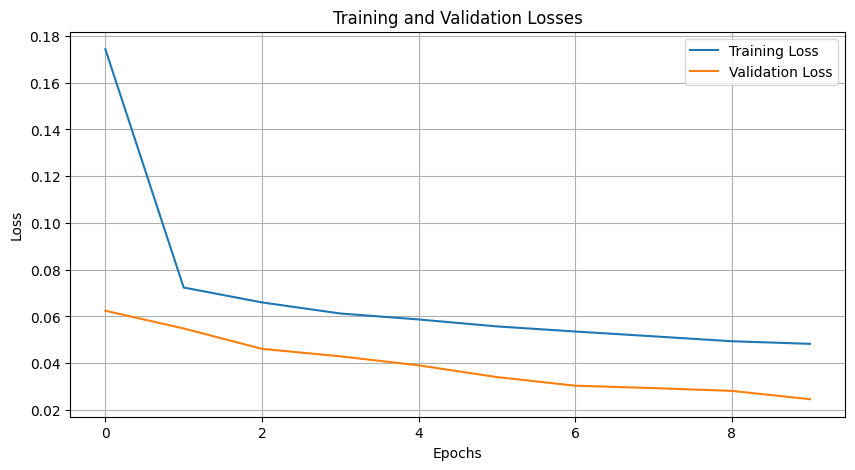

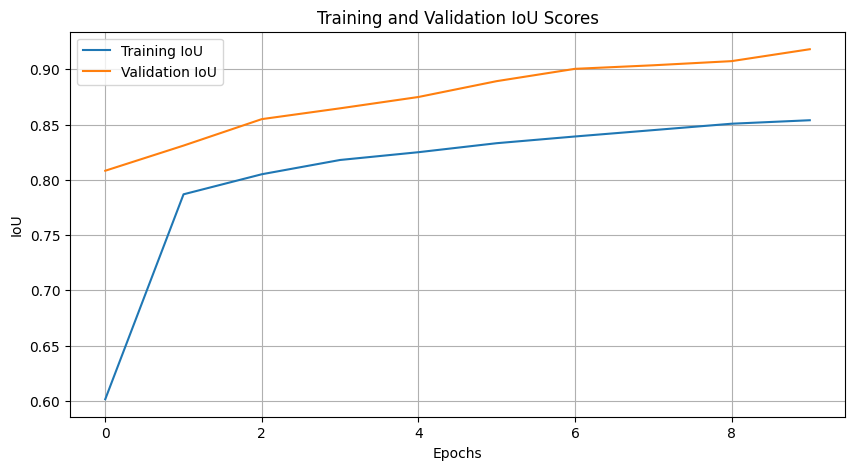

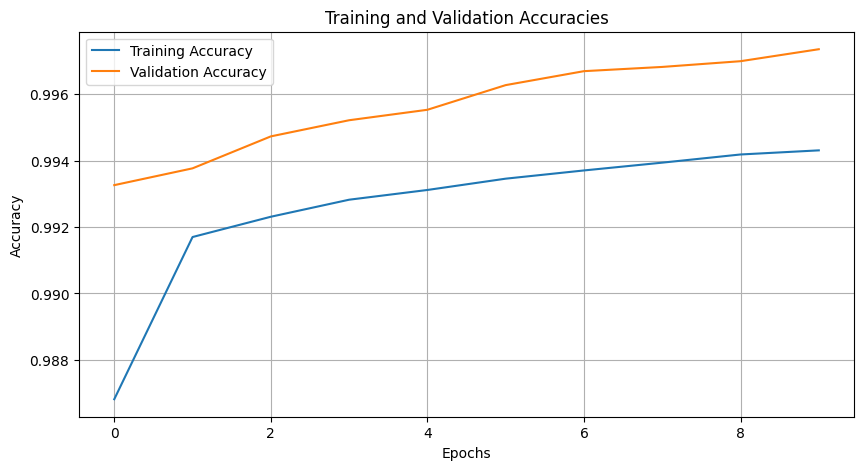

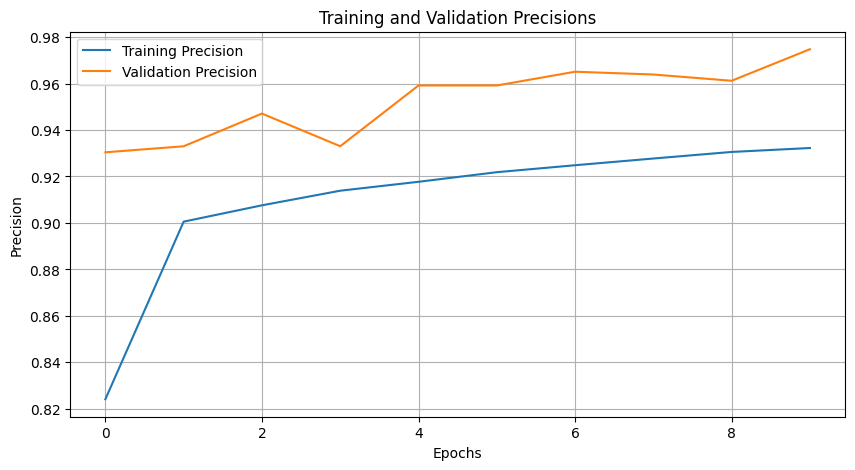

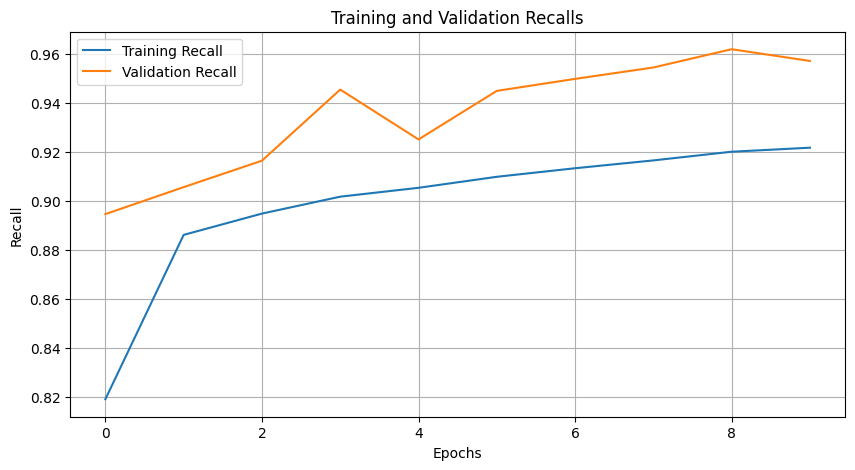

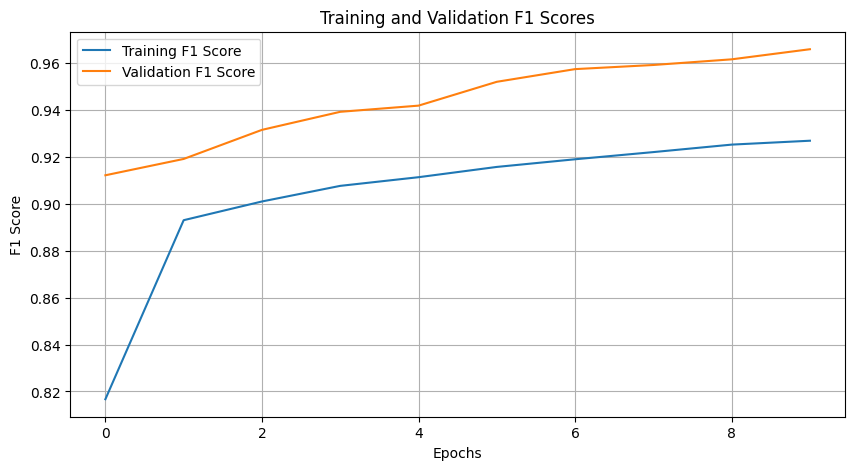

In [ ]:
# prompt: I need different graphs based on the model

import matplotlib.pyplot as plt

# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation IoU scores
plt.figure(figsize=(10, 5))
plt.plot(train_iou, label='Training IoU')
plt.plot(val_iou, label='Validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.title('Training and Validation IoU Scores')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation accuracies
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation precisions
plt.figure(figsize=(10, 5))
plt.plot(train_precision, label='Training Precision')
plt.plot(val_precision, label='Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Training and Validation Precisions')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation recalls
plt.figure(figsize=(10, 5))
plt.plot(train_recall, label='Training Recall')
plt.plot(val_recall, label='Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Training and Validation Recalls')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation F1 scores
plt.figure(figsize=(10, 5))
plt.plot(train_f1, label='Training F1 Score')
plt.plot(val_f1, label='Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('Training and Validation F1 Scores')
plt.legend()
plt.grid(True)
plt.show()


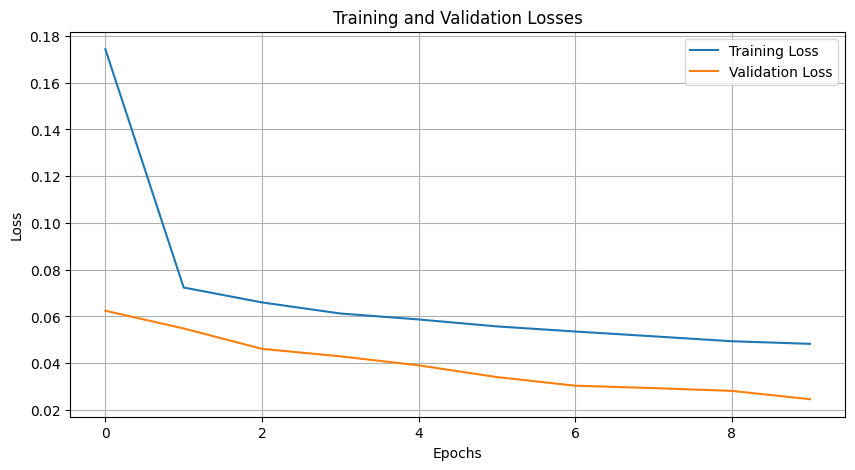

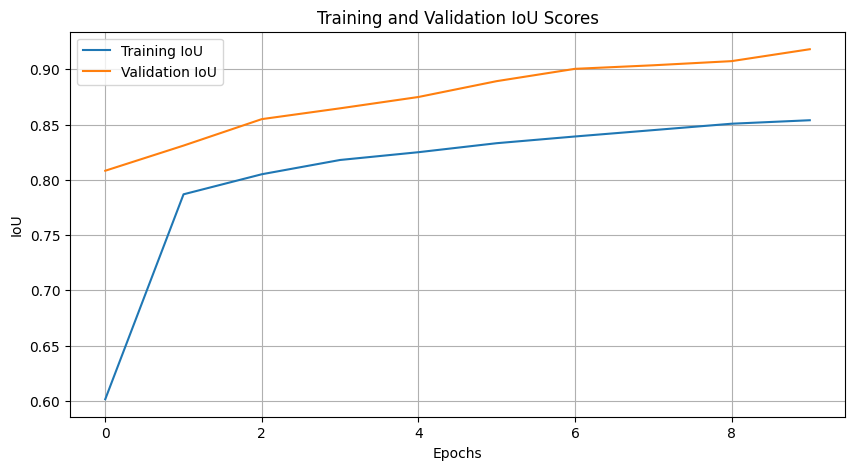

In [ ]:
import matplotlib.pyplot as plt
# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation IoU scores
plt.figure(figsize=(10, 5))
plt.plot(train_iou, label='Training IoU')
plt.plot(val_iou, label='Validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.title('Training and Validation IoU Scores')
plt.legend()
plt.grid(True)
plt.show()

